## **III Exploratory Data Analysis**

In this section, we will explore the data to understand patterns, distributions, and relationships between variables. This helps us gather insights and decide on the best features for the model.

## **III.1 Import Libraries and Load Data**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_dir = '../data/basketballPlayoffs_cleaned/'
awards_players = pd.read_csv(os.path.join(data_dir, 'awards_players_cleaned.csv'))
coaches = pd.read_csv(os.path.join(data_dir, 'coaches_cleaned.csv'))
players = pd.read_csv(os.path.join(data_dir, 'players_cleaned.csv'))
players_teams = pd.read_csv(os.path.join(data_dir, 'players_teams_cleaned.csv'))
series_post = pd.read_csv(os.path.join(data_dir, 'series_post_cleaned.csv'))
teams = pd.read_csv(os.path.join(data_dir, 'teams_cleaned.csv'))
teams_post = pd.read_csv(os.path.join(data_dir, 'teams_post_cleaned.csv'))

## **III.2 Team Performance Trends**
### **III.2.1 Win-Loss Record Over Seasons**
Analyze the win-loss performance of teams across different seasons. This helps identify trends and the consistency of teams' performances over time.

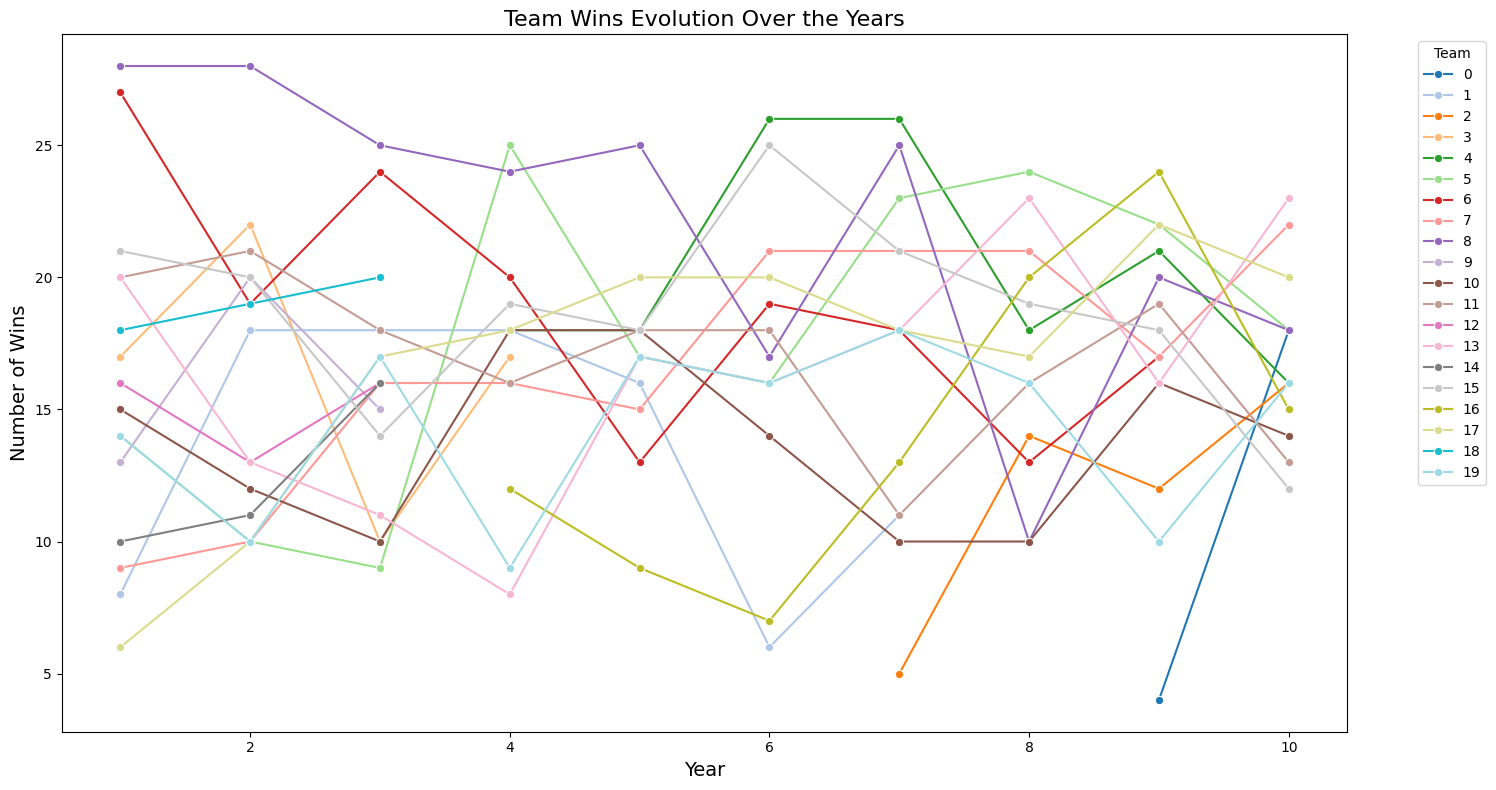

In [17]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=teams, x='year', y='won', hue='tmID', palette='tab20', marker='o')

plt.title('Team Wins Evolution Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')

plt.tight_layout()

plt.show()


This analysis calculates and visualizes the win-loss records of teams over the last 10 years. It groups the teams by their ID (`tmID`), sums up the wins (`won`) and points scored (`o_pts`), and displays the total wins and points for each team. The data is then visualized with bar charts to show the performance of teams in terms of wins and points scored over the last decade and the most recent season.

    tmID  won
8      8  220
15    15  187
5      5  178
11    11  170
6      6  170
17    17  168
7      7  168
13    13  165
19    19  143
4      4  143
10    10  137
16    16  100
1      1   95
3      3   66
18    18   57
9      9   48
2      2   47
12    12   45
14    14   37
0      0   22


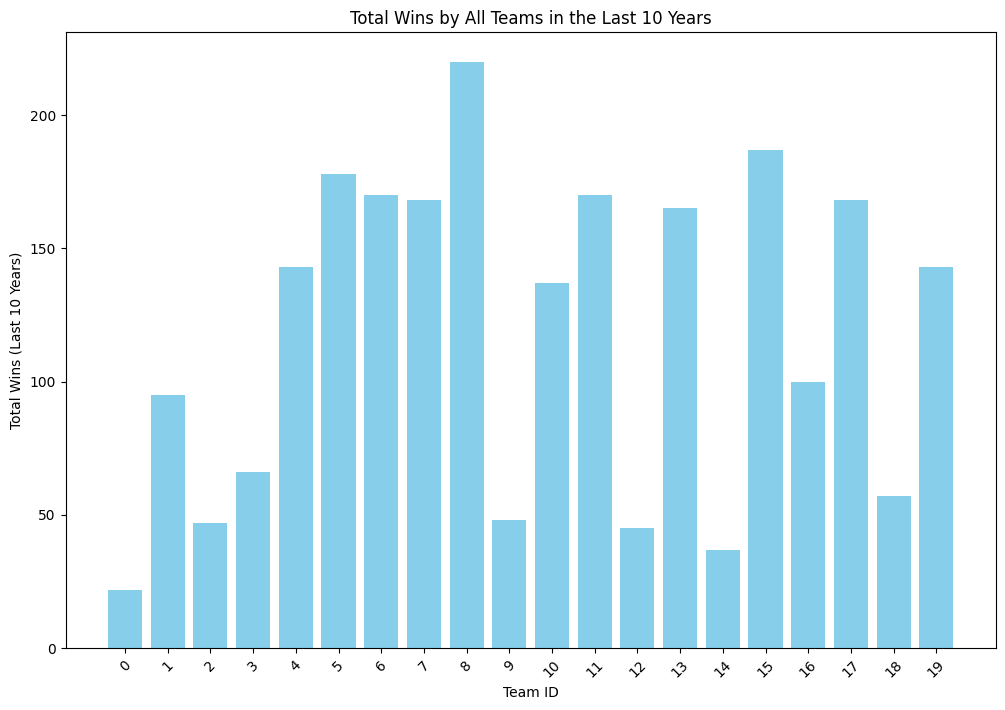

    tmID  o_pts
13    13  25307
8      8  24869
5      5  24262
15    15  23962
10    10  23686
17    17  23669
19    19  23442
7      7  23162
11    11  23080
6      6  20902
4      4  17892
16    16  16748
1      1  15342
2      2   9892
3      3   8489
18    18   7038
12    12   6602
14    14   6438
9      9   5834
0      0   5395


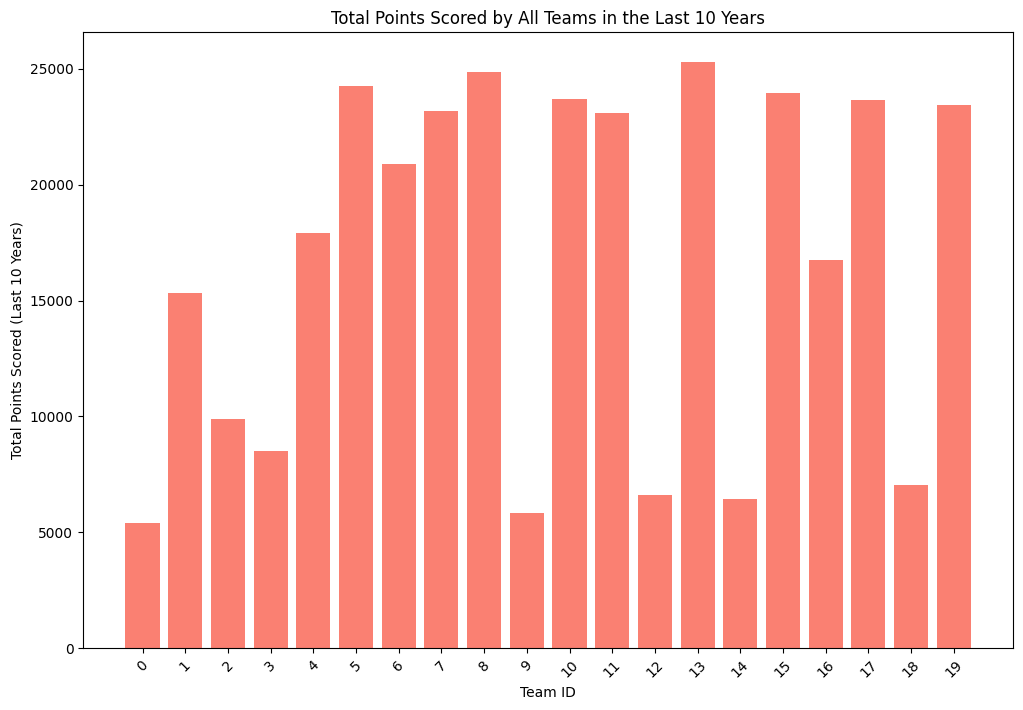

    tmID   o_pts
13    13  3156.0
0      0  2861.0
10    10  2731.0
5      5  2652.0
4      4  2651.0
16    16  2615.0
15    15  2610.0
7      7  2606.0
19    19  2585.0
2      2  2573.0
17    17  2544.0
8      8  2533.0
11    11  2512.0
12    12     0.0
14    14     0.0
1      1     0.0
9      9     0.0
6      6     0.0
18    18     0.0
3      3     0.0


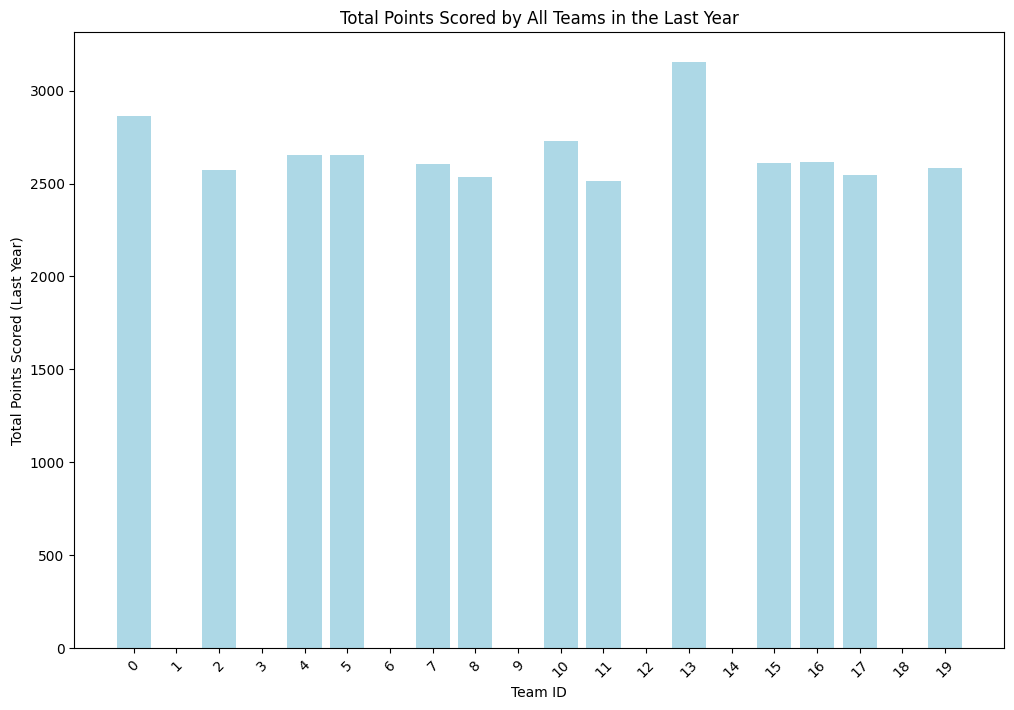

In [18]:
last_10_years = 10
current_year = teams['year'].max()  
start_year = current_year - last_10_years

teams_last_10_years = teams[(teams['year'] >= start_year) & (teams['year'] <= current_year)]

team_wins = teams_last_10_years.groupby('tmID')['won'].sum().reset_index()

all_teams = pd.DataFrame({'tmID': teams['tmID'].unique()})
team_wins = pd.merge(all_teams, team_wins, on='tmID', how='left').fillna(0)

team_wins_sorted = team_wins.sort_values(by='won', ascending=False)

print(team_wins_sorted)

plt.figure(figsize=(12, 8))
plt.bar(team_wins_sorted['tmID'], team_wins_sorted['won'], color='skyblue')
plt.xlabel('Team ID')
plt.ylabel('Total Wins (Last 10 Years)')
plt.title('Total Wins by All Teams in the Last 10 Years') 
plt.xticks(team_wins_sorted['tmID'], rotation=45)  
plt.show()

team_points = teams_last_10_years.groupby('tmID')['o_pts'].sum().reset_index()

team_points = pd.merge(all_teams, team_points, on='tmID', how='left').fillna(0)

team_points_sorted = team_points.sort_values(by='o_pts', ascending=False)

print(team_points_sorted)

plt.figure(figsize=(12, 8))
plt.bar(team_points_sorted['tmID'], team_points_sorted['o_pts'], color='salmon')
plt.xlabel('Team ID')
plt.ylabel('Total Points Scored (Last 10 Years)')
plt.title('Total Points Scored by All Teams in the Last 10 Years')  
plt.xticks(team_points_sorted['tmID'], rotation=45)  
plt.show()

teams_last_year = teams[teams['year'] == current_year]
team_points_last_year = teams_last_year.groupby('tmID')['o_pts'].sum().reset_index()

team_points_last_year = pd.merge(all_teams, team_points_last_year, on='tmID', how='left').fillna(0)

team_points_last_year_sorted = team_points_last_year.sort_values(by='o_pts', ascending=False)

print(team_points_last_year_sorted)

plt.figure(figsize=(12, 8))
plt.bar(team_points_last_year_sorted['tmID'], team_points_last_year_sorted['o_pts'], color='lightblue')
plt.xlabel('Team ID')
plt.ylabel('Total Points Scored (Last Year)')
plt.title('Total Points Scored by All Teams in the Last Year')  
plt.xticks(team_points_last_year_sorted['tmID'], rotation=45)  
plt.show()

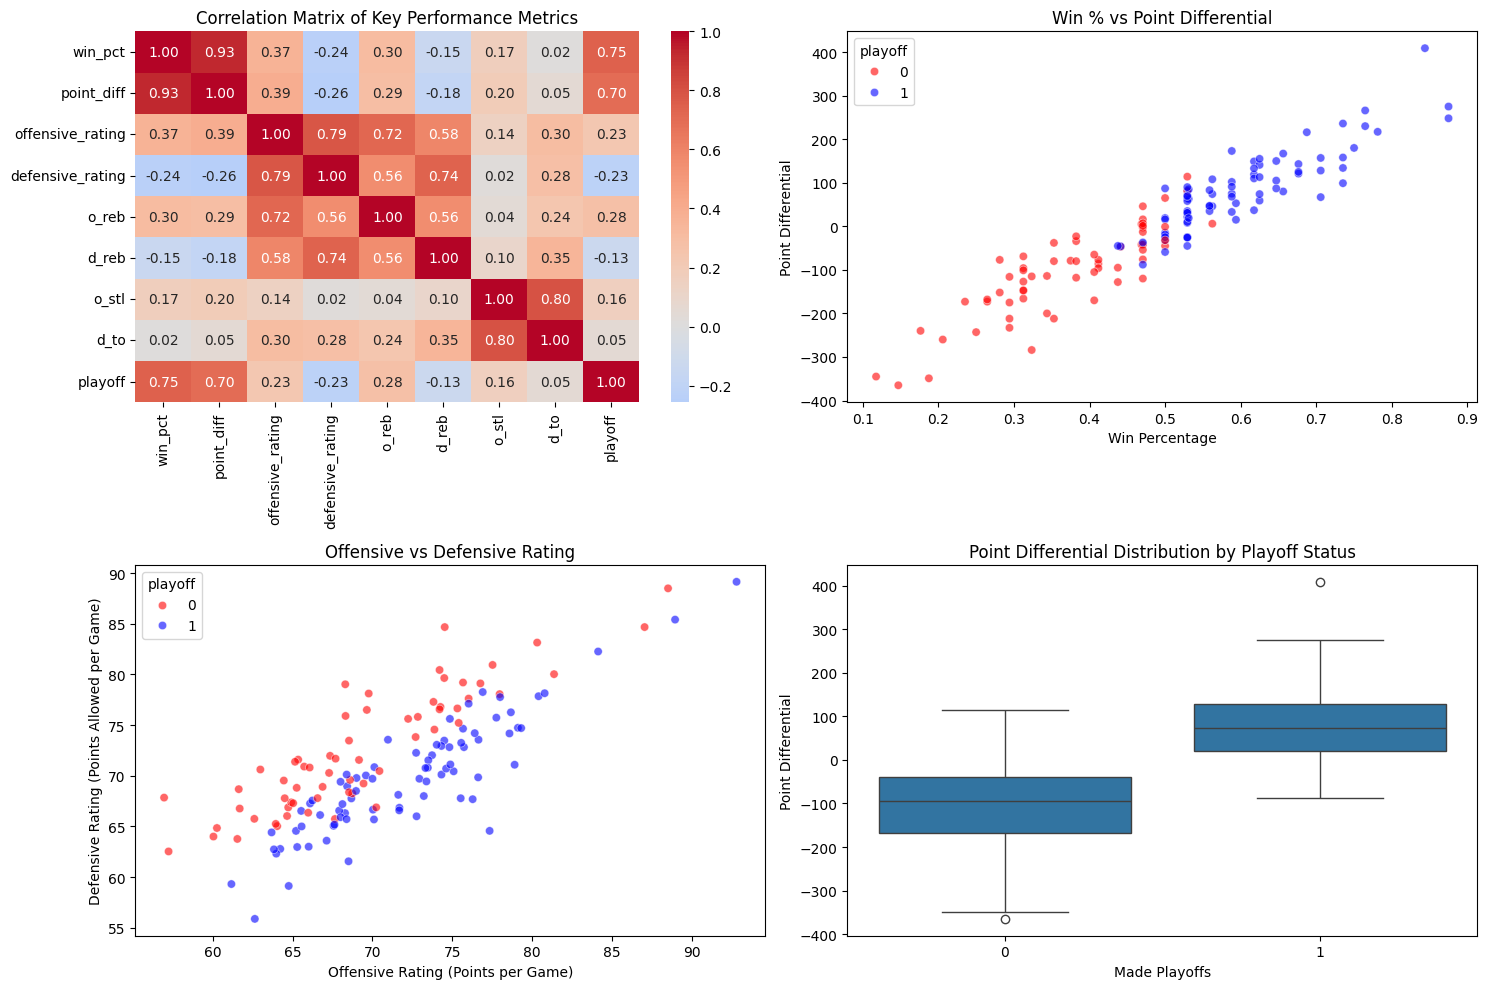

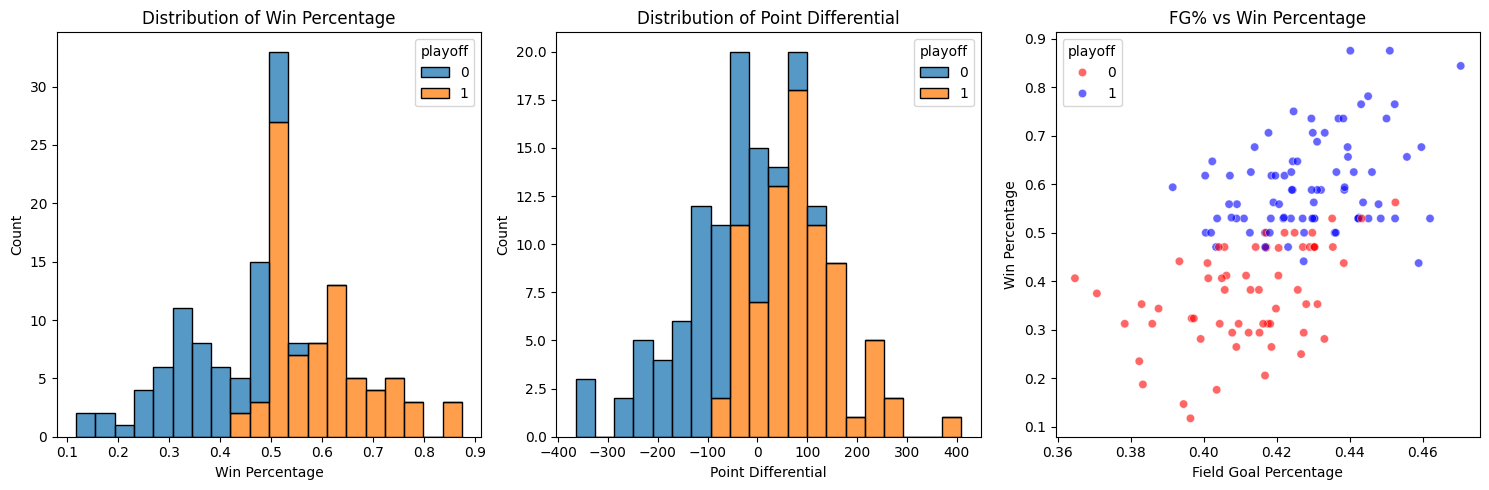


Summary Statistics for Playoff vs Non-Playoff Teams:
          win_pct  point_diff  offensive_rating  defensive_rating  \
playoff                                                             
0        0.372717 -104.322581         69.303072         72.451287   
1        0.598644   80.875000         72.204366         69.763764   

               o_reb        d_reb       o_stl        d_to  playoff  
playoff                                                             
0        1028.096774  1075.709677  256.596774  507.467742      0.0  
1        1087.262500  1050.375000  268.162500  512.762500      1.0  


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate win percentage and point differential
teams['win_pct'] = teams['won'] / (teams['won'] + teams['lost'])
teams['point_diff'] = teams['o_pts'] - teams['d_pts']
teams['fg_pct'] = teams['o_fgm'] / teams['o_fga']
teams['defensive_rating'] = teams['d_pts'] / (teams['won'] + teams['lost'])
teams['offensive_rating'] = teams['o_pts'] / (teams['won'] + teams['lost'])

# Create correlation matrix for key metrics
metrics = ['win_pct', 'point_diff', 'offensive_rating', 'defensive_rating', 
          'o_reb', 'd_reb', 'o_stl', 'd_to', 'playoff']
correlation_matrix = teams[metrics].corr()

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Correlation Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Key Performance Metrics')

# 2. Win Percentage vs Point Differential (colored by playoff status)
plt.subplot(2, 2, 2)
sns.scatterplot(data=teams, x='win_pct', y='point_diff', hue='playoff', 
                palette=['red', 'blue'], alpha=0.6)
plt.title('Win % vs Point Differential')
plt.xlabel('Win Percentage')
plt.ylabel('Point Differential')

# 3. Offensive vs Defensive Rating
plt.subplot(2, 2, 3)
sns.scatterplot(data=teams, x='offensive_rating', y='defensive_rating', 
                hue='playoff', palette=['red', 'blue'], alpha=0.6)
plt.title('Offensive vs Defensive Rating')
plt.xlabel('Offensive Rating (Points per Game)')
plt.ylabel('Defensive Rating (Points Allowed per Game)')

# 4. Box plot of Point Differential by Playoff Status
plt.subplot(2, 2, 4)
sns.boxplot(data=teams, x='playoff', y='point_diff')
plt.title('Point Differential Distribution by Playoff Status')
plt.xlabel('Made Playoffs')
plt.ylabel('Point Differential')

plt.tight_layout()
plt.show()

# Additional analysis: Performance metrics distribution
plt.figure(figsize=(15, 5))

# 1. Distribution of Win Percentage
plt.subplot(1, 3, 1)
sns.histplot(data=teams, x='win_pct', hue='playoff', multiple="stack", bins=20)
plt.title('Distribution of Win Percentage')
plt.xlabel('Win Percentage')

# 2. Distribution of Point Differential
plt.subplot(1, 3, 2)
sns.histplot(data=teams, x='point_diff', hue='playoff', multiple="stack", bins=20)
plt.title('Distribution of Point Differential')
plt.xlabel('Point Differential')

# 3. Field Goal Percentage vs Win Percentage
plt.subplot(1, 3, 3)
sns.scatterplot(data=teams, x='fg_pct', y='win_pct', hue='playoff', 
                palette=['red', 'blue'], alpha=0.6)
plt.title('FG% vs Win Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Percentage')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Playoff vs Non-Playoff Teams:")
print(teams.groupby('playoff')[metrics].mean())


### **III.2.2 Offensive vs Defensive Performance**

This visualization compares teams' offensive performance (points scored) against their defensive performance (points allowed). A scatter plot is used to represent teams with different colors for each team (`tmID`), the size of each point represents the number of wins (`won`), and lines are drawn at the average values for offensive and defensive points. The chart highlights the correlation between scoring and allowing points, showing how teams perform both offensively and defensively.

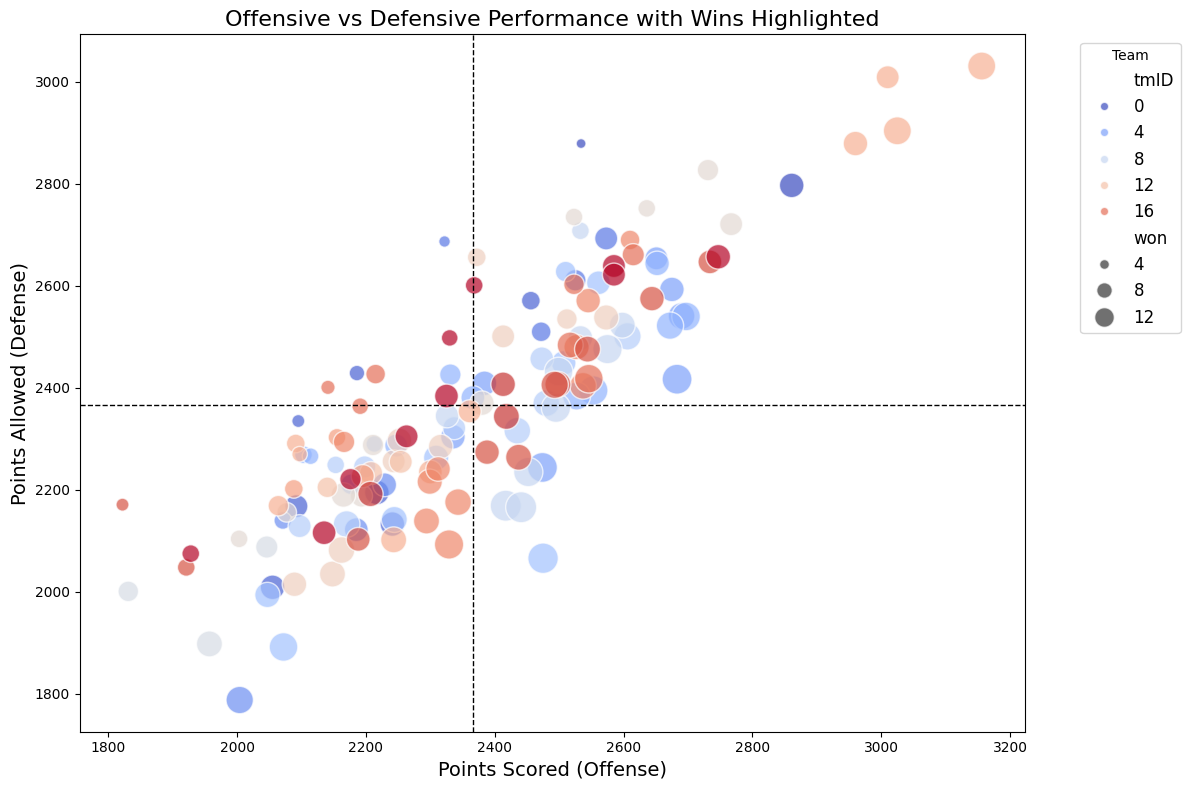

In [20]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=teams, x='o_pts', y='d_pts', hue='tmID', size='won',
                          sizes=(50, 500), palette='coolwarm', alpha=0.7)

plt.axhline(y=teams['d_pts'].mean(), color='black', linestyle='--', linewidth=1)
plt.axvline(x=teams['o_pts'].mean(), color='black', linestyle='--', linewidth=1)

plt.title('Offensive vs Defensive Performance with Wins Highlighted', fontsize=16)
plt.xlabel('Points Scored (Offense)', fontsize=14)
plt.ylabel('Points Allowed (Defense)', fontsize=14)

handles, labels = scatter.get_legend_handles_labels()
size_legend = plt.legend(handles[-4:], labels[-4:], title='Wins (Size)', 
                         bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=12)

scatter.legend(handles[:-4], labels[:-4], title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()

plt.show()

### **III.2.3 Team Performance Metrics Distribution**

This set of histograms visualizes the distribution of various team performance metrics, such as wins (`won`), losses (`lost`), offensive points (`o_pts`), defensive points (`d_pts`), offensive rebounds (`o_reb`), and defensive rebounds (`d_reb`).

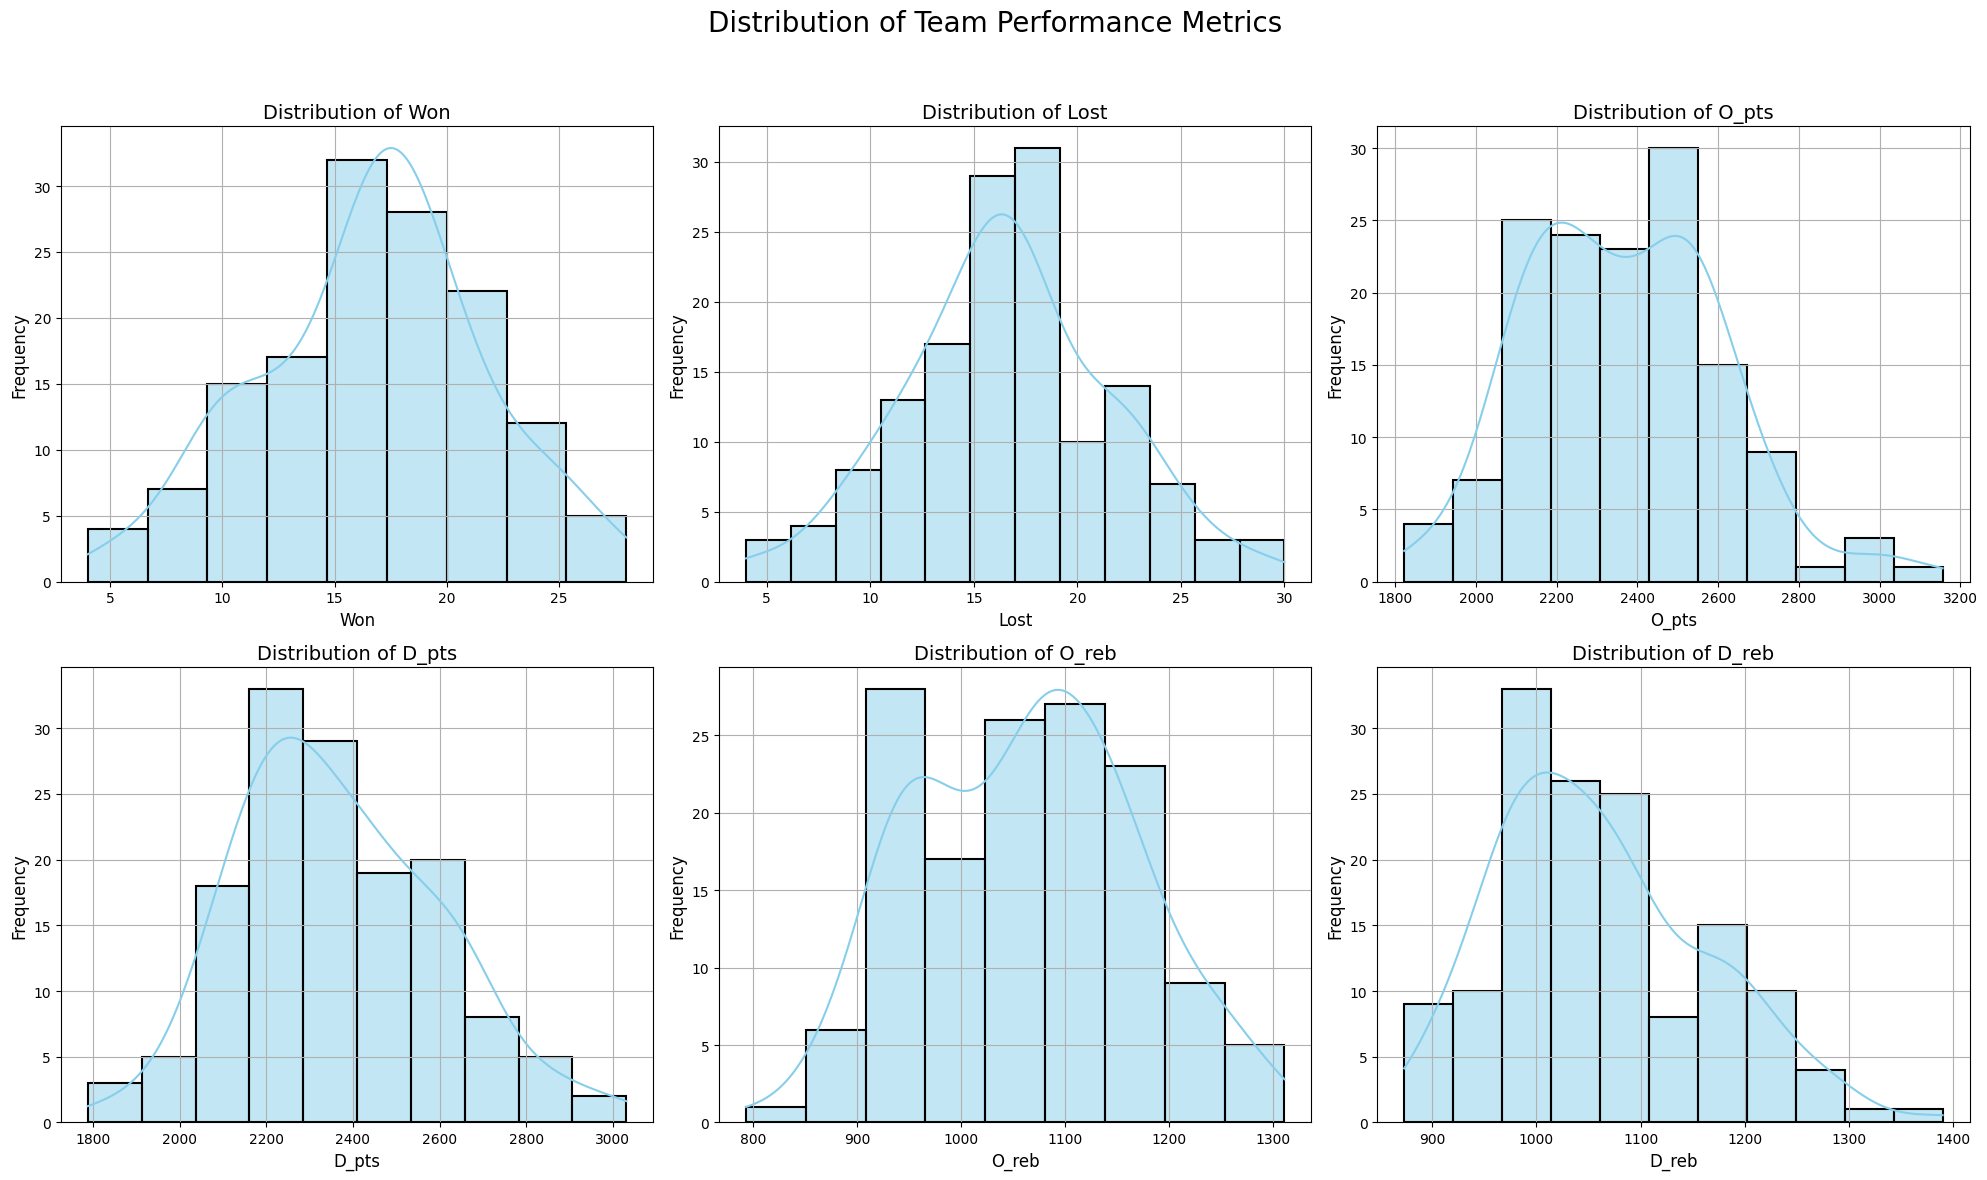

In [21]:
performance_metrics = ['won', 'lost', 'o_pts', 'd_pts', 'o_reb', 'd_reb']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Team Performance Metrics', fontsize=20)

for i, metric in enumerate(performance_metrics):
    sns.histplot(data=teams, x=metric, kde=True, color='skyblue', ax=axes[i//3, i%3], edgecolor='black', linewidth=1.5)
    
    axes[i//3, i%3].set_title(f'Distribution of {metric.capitalize()}', fontsize=14)  
    axes[i//3, i%3].set_xlabel(metric.capitalize(), fontsize=12)  
    axes[i//3, i%3].set_ylabel('Frequency', fontsize=12)
    axes[i//3, i%3].grid(True)  

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## **III.3 Player Statistics Analysis**

### **III.3.1 Top Players by Points Scored**

This plot displays the top 20 players based on the total points scored

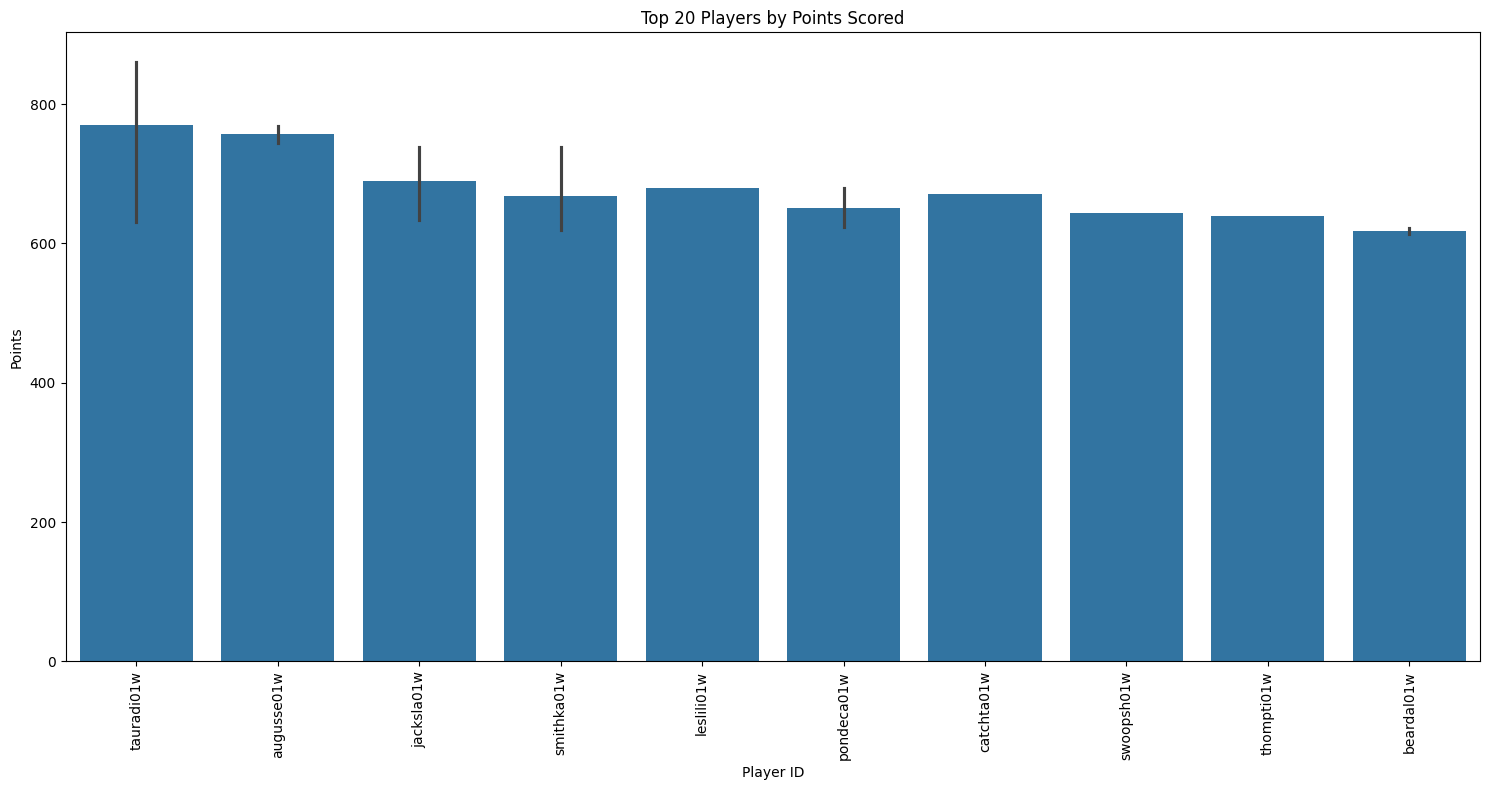

In [22]:
top_scorers = players_teams.nlargest(20, 'points')
plt.figure(figsize=(15, 8))
sns.barplot(data=top_scorers, x='playerID', y='points')
plt.title('Top 20 Players by Points Scored')
plt.xlabel('Player ID')
plt.ylabel('Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **III.3.2 Player Performance Correlation Heatmap**
This heatmap visualizes the correlation between various player performance metrics such as games played (GP), minutes, points, rebounds, assists, steals, blocks, and turnovers.

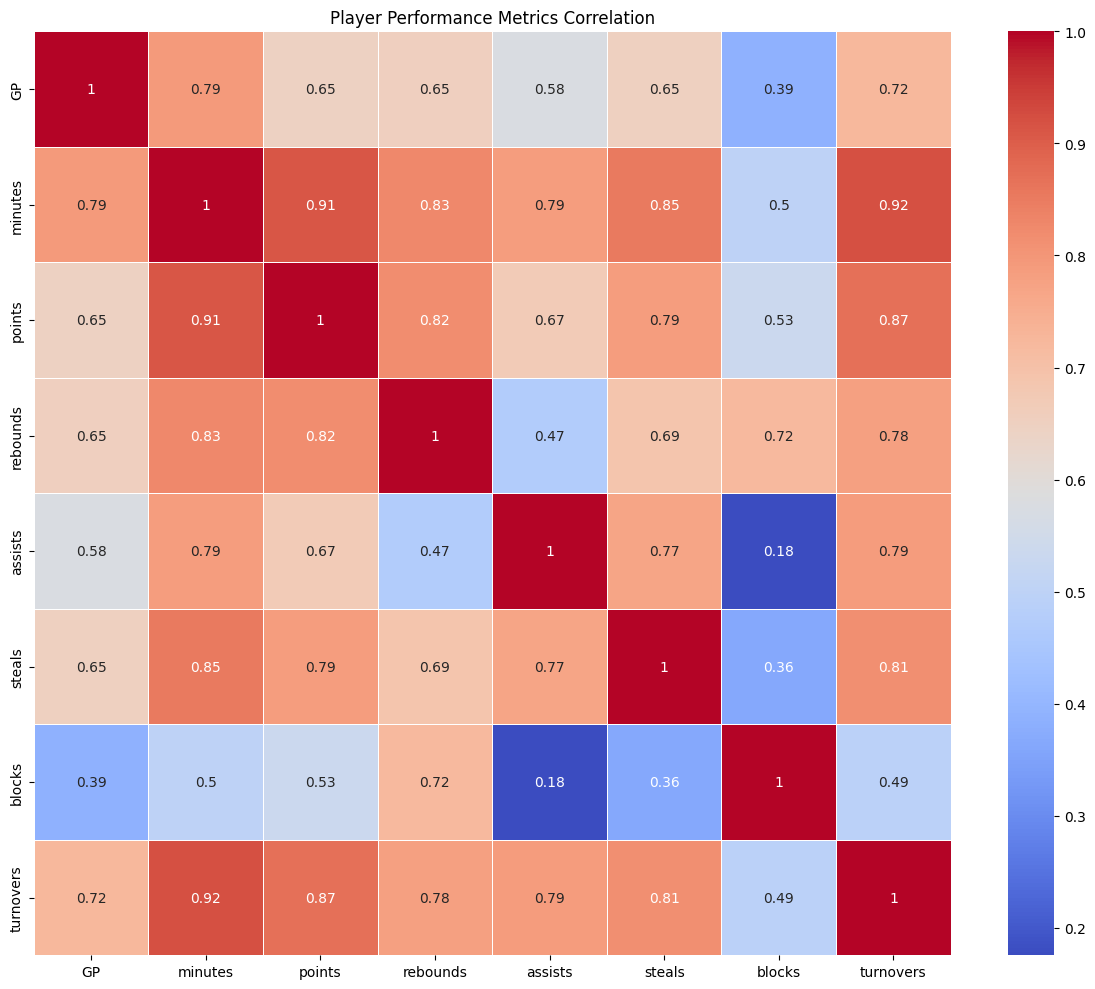

In [23]:
player_stats = ['GP', 'minutes', 'points', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers']
correlation = players_teams[player_stats].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Player Performance Metrics Correlation')
plt.tight_layout()
plt.show()

### **III.3.3 Player Minutes Distribution**

This plot displays the distribution of minutes played by players across all games.

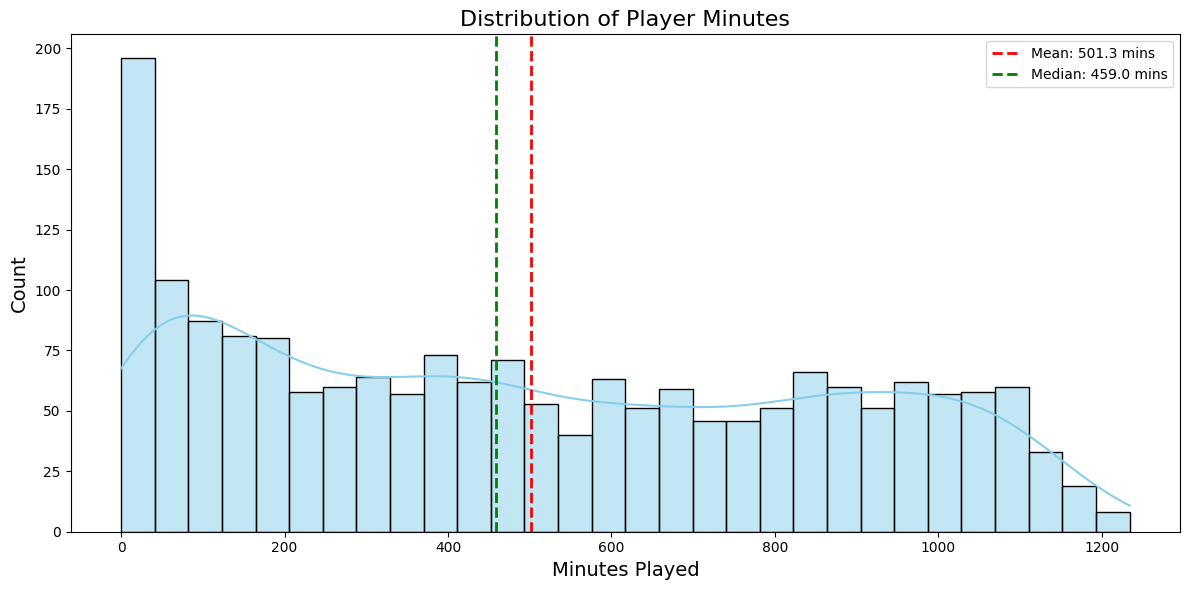

In [24]:
plt.figure(figsize=(12, 6))

sns.histplot(data=players_teams, x='minutes', kde=True, color='skyblue', bins=30, edgecolor='black')

mean_minutes = players_teams['minutes'].mean()
plt.axvline(mean_minutes, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_minutes:.1f} mins')

median_minutes = players_teams['minutes'].median()
plt.axvline(median_minutes, color='green', linestyle='--', linewidth=2, label=f'Median: {median_minutes:.1f} mins')

plt.title('Distribution of Player Minutes', fontsize=16)
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend()

plt.tight_layout()

plt.show()

## **III.4 Coach Impact Analysis**

### **III.4.1 Top Coaches by Win Percentage**
This plot visualizes the top 10 coaches based on their win percentage.

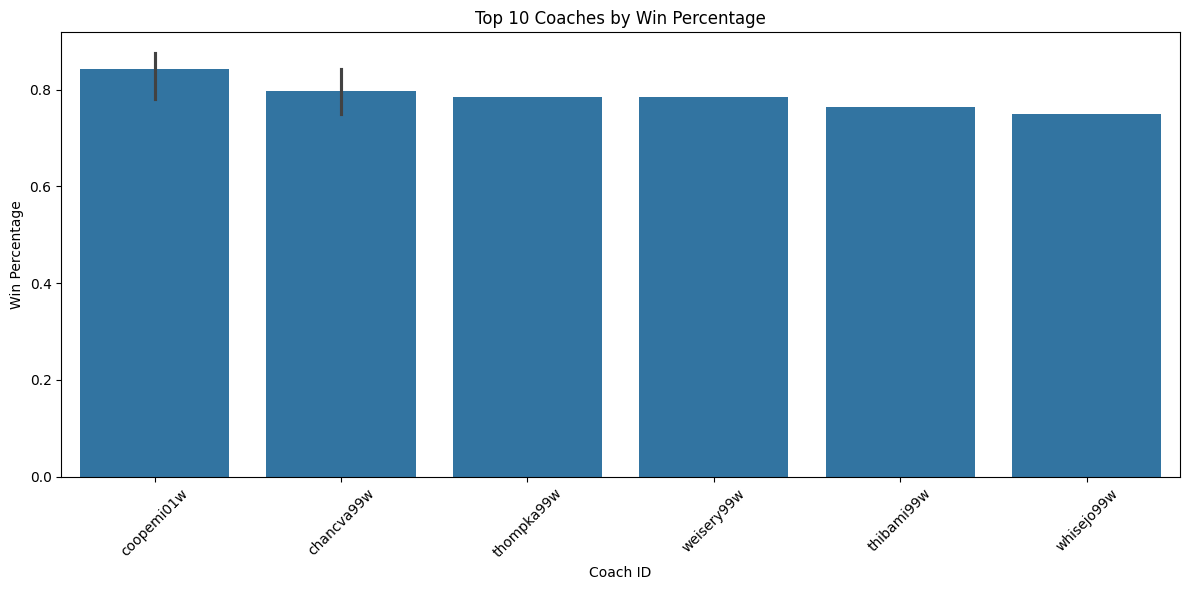

In [25]:
coaches['win_pct'] = coaches['won'] / (coaches['won'] + coaches['lost'])
top_coaches = coaches.nlargest(10, 'win_pct')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_coaches, x='coachID', y='win_pct')
plt.title('Top 10 Coaches by Win Percentage')
plt.xlabel('Coach ID')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **III.4.2 Coach Performance: Regular Season vs Postseason**
This scatter plot compares the regular season wins versus postseason wins for each coach.

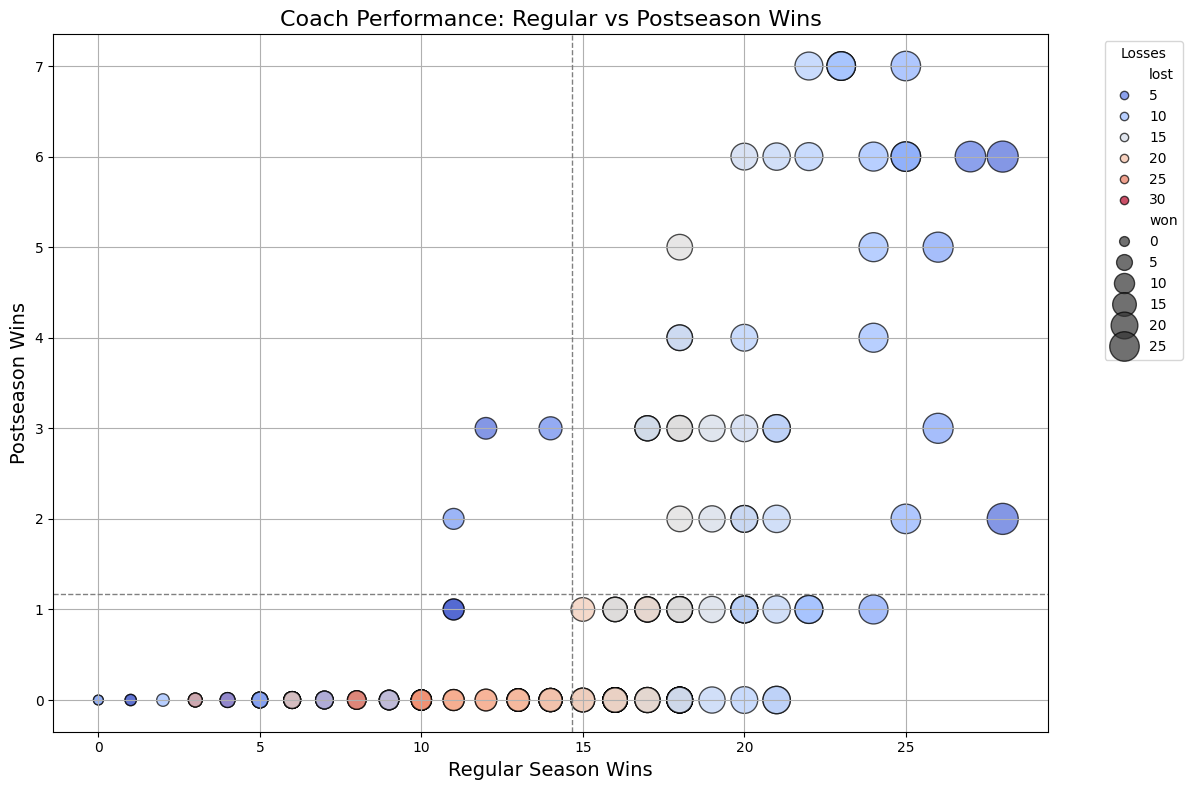

In [26]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=coaches, x='won', y='post_wins', size='won', hue='lost',
                          palette='coolwarm', sizes=(50, 500), alpha=0.7, edgecolor='black')

plt.axhline(y=coaches['post_wins'].mean(), color='gray', linestyle='--', linewidth=1)
plt.axvline(x=coaches['won'].mean(), color='gray', linestyle='--', linewidth=1)

plt.title('Coach Performance: Regular vs Postseason Wins', fontsize=16)
plt.xlabel('Regular Season Wins', fontsize=14)
plt.ylabel('Postseason Wins', fontsize=14)

scatter.legend(title='Losses', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

plt.tight_layout()

plt.show()

## **III.5 Playoff Qualification Patterns**

### **III.5.1 Playoff Teams Win Distribution**
This violin plot shows the distribution of wins for teams that qualified for the playoffs (`playoff = 1`) versus teams that did not (`playoff = 0`).

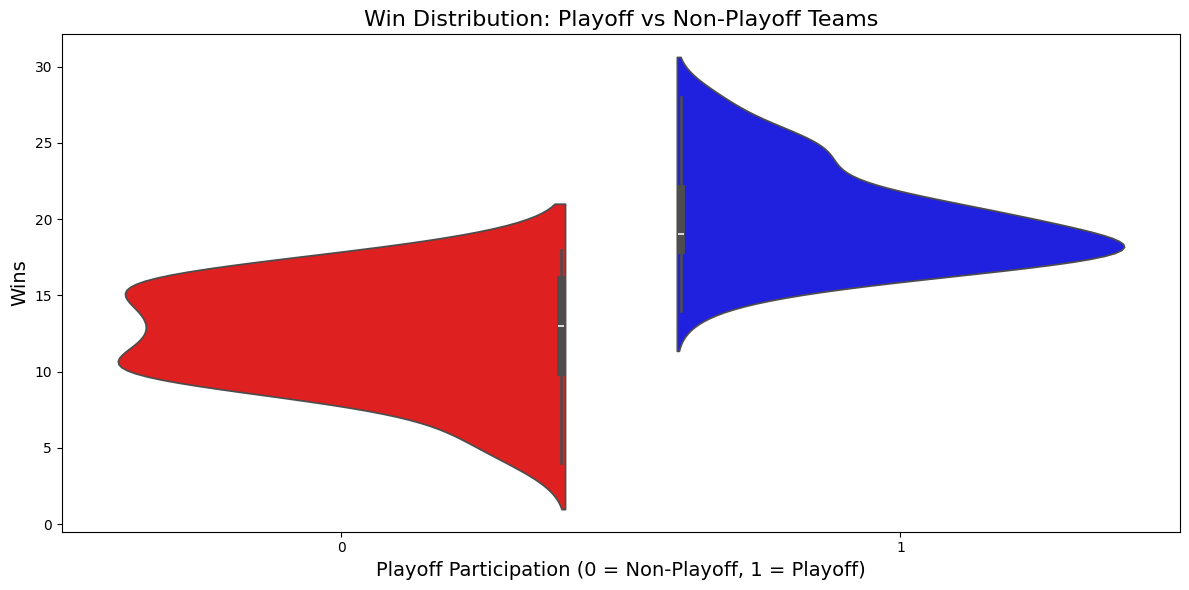

In [27]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=teams,
    x='playoff',
    y='won',
    hue='playoff',  
    legend=False,  
    palette=['red', 'blue'],
    split=True
)

plt.title('Win Distribution: Playoff vs Non-Playoff Teams', fontsize=16)
plt.xlabel('Playoff Participation (0 = Non-Playoff, 1 = Playoff)', fontsize=14)
plt.ylabel('Wins', fontsize=14)

plt.tight_layout()

plt.show()

### **III.5.2 Playoff Qualification Factors**
This set of boxplots examines the relationship between several team performance metrics and playoff qualification. The metrics include wins, points scored, points allowed, rebounds, and assists, etc...

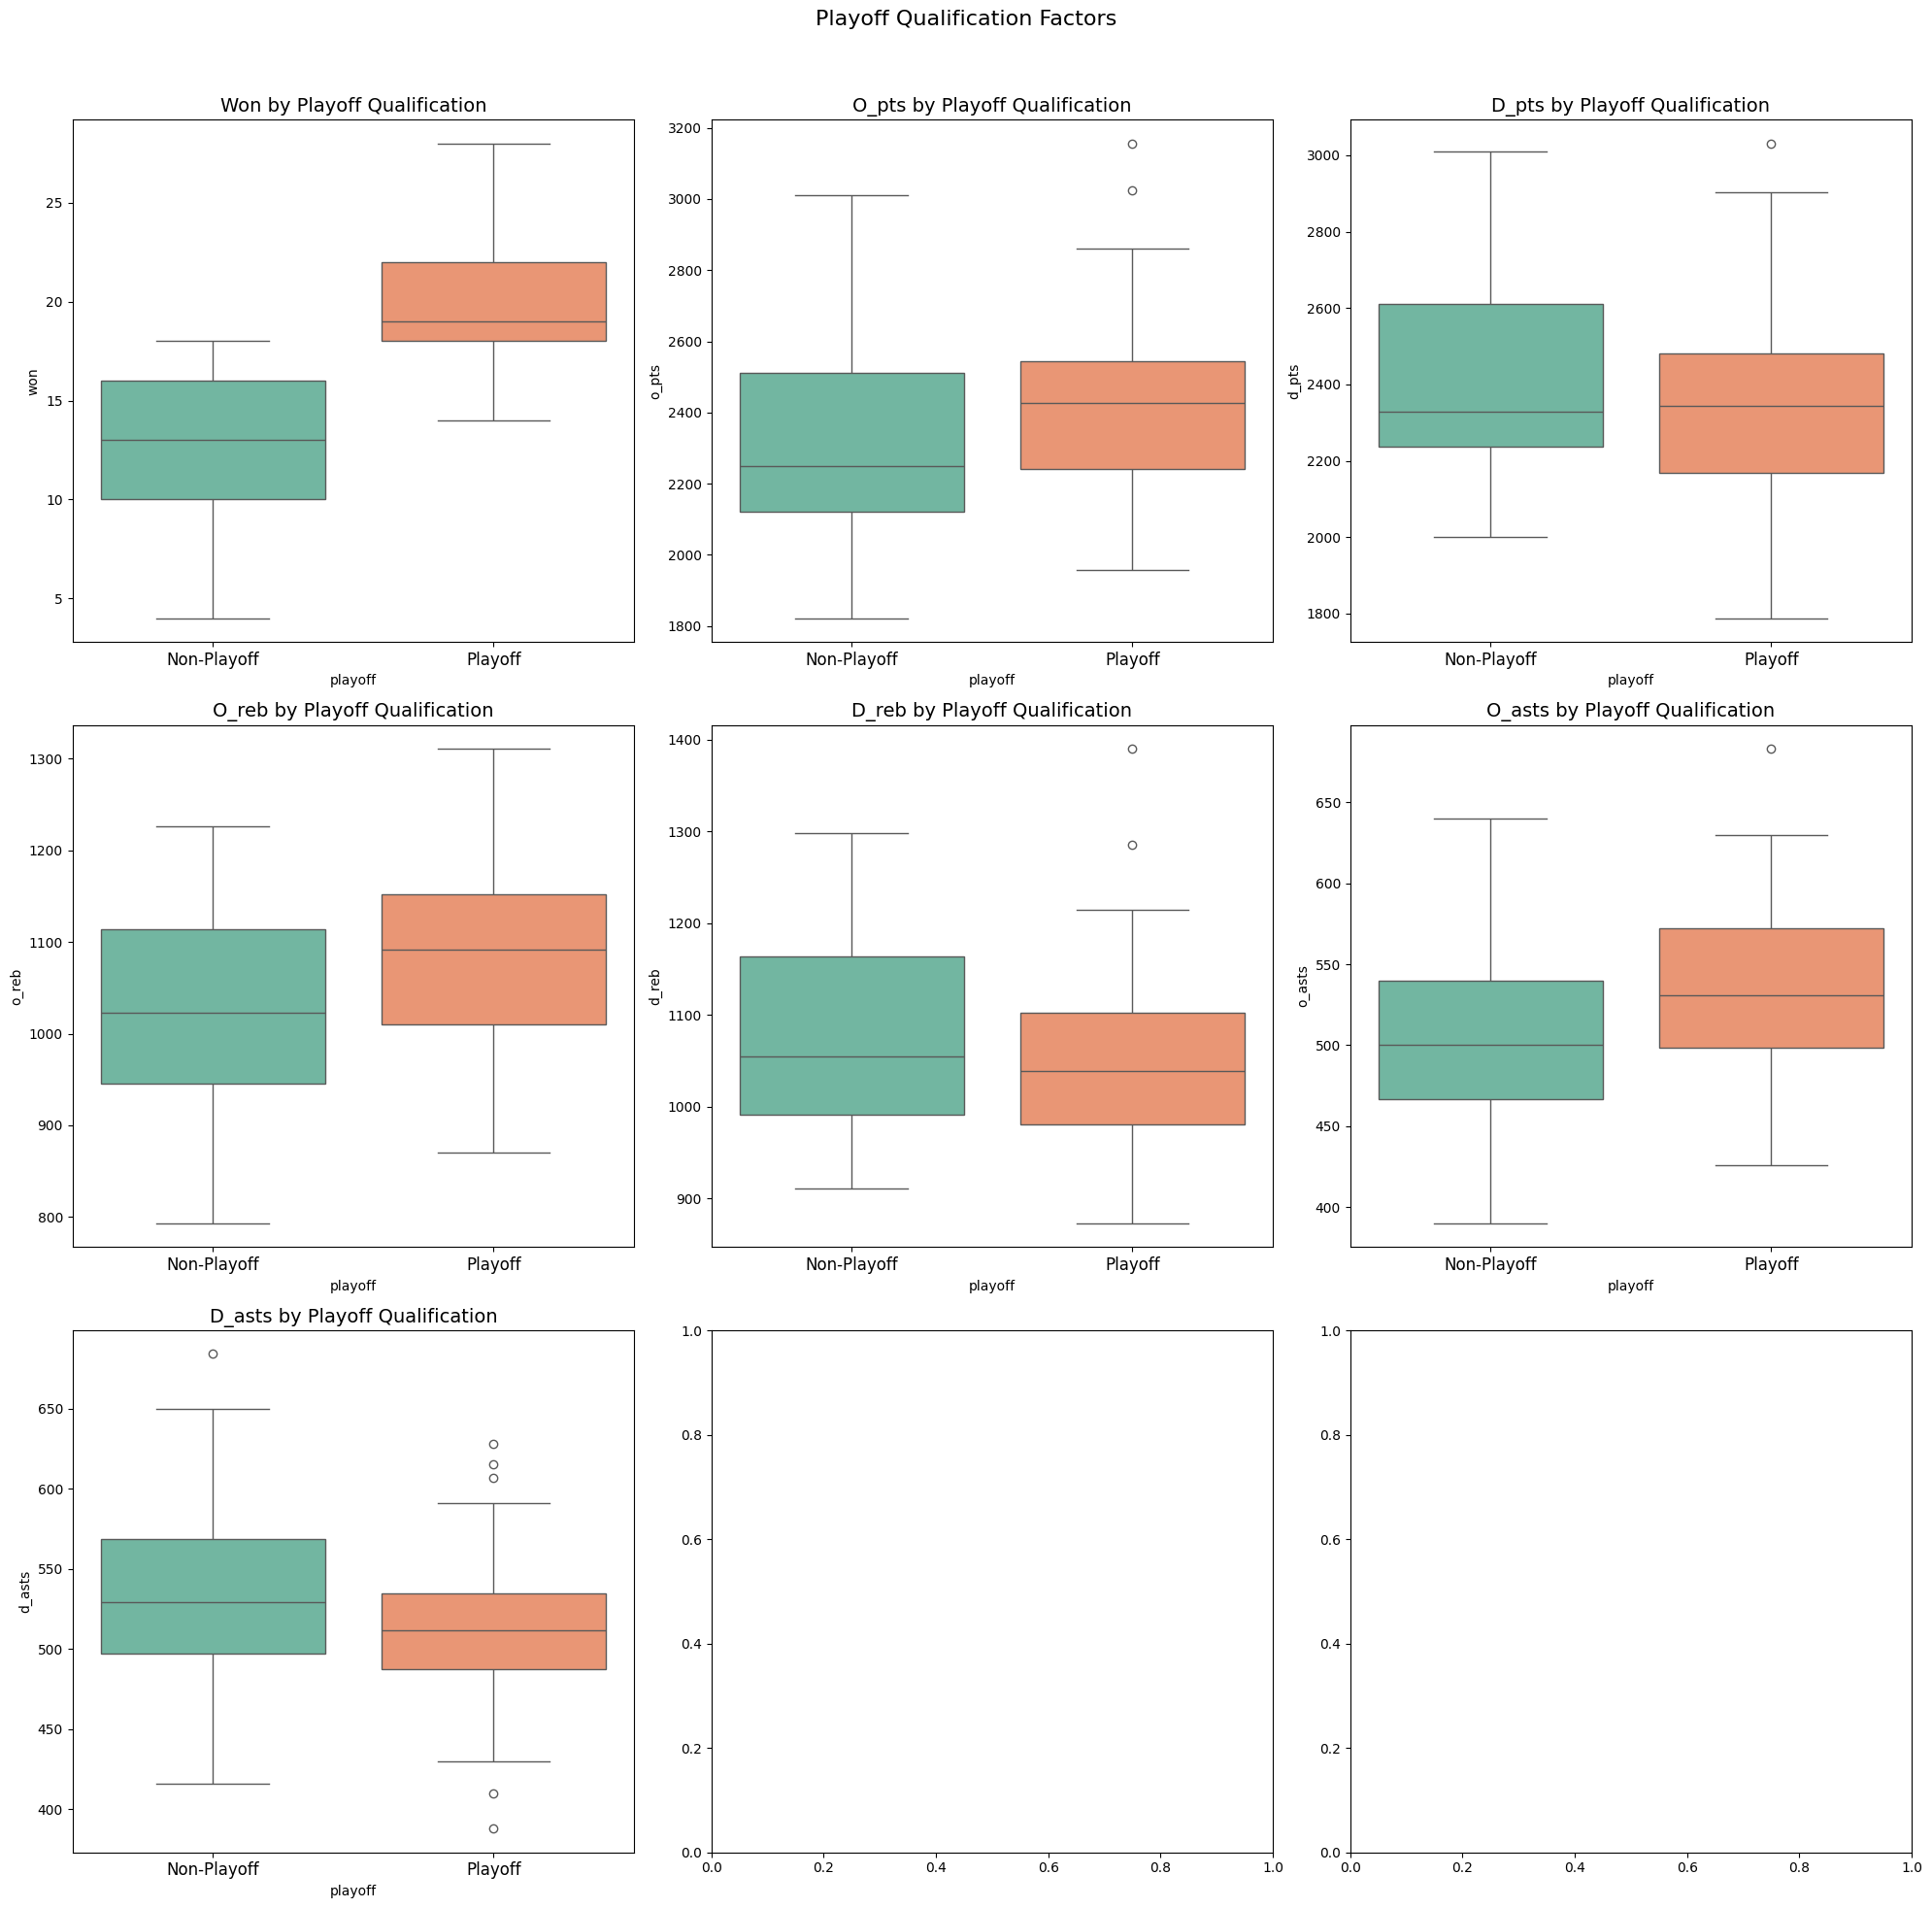

In [28]:
playoff_factors = ['won', 'o_pts', 'd_pts', 'o_reb', 'd_reb', 'o_asts', 'd_asts']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Playoff Qualification Factors', fontsize=16)

for i, factor in enumerate(playoff_factors):
    sns.boxplot(data=teams, x='playoff', y=factor, hue='playoff', ax=axes[i//3, i%3], palette='Set2', legend=False)
    
    axes[i//3, i%3].set_xticks([0, 1])
    axes[i//3, i%3].set_xticklabels(['Non-Playoff', 'Playoff'], fontsize=12)
    
    axes[i//3, i%3].set_title(f'{factor.capitalize()} by Playoff Qualification', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## **II.6 Award Analysis**

### **III.6.1 Awards Distribution by Player**

This analysis focuses on the distribution of awards among players. The chart helps to identify players who have consistently been recognized for their performance.

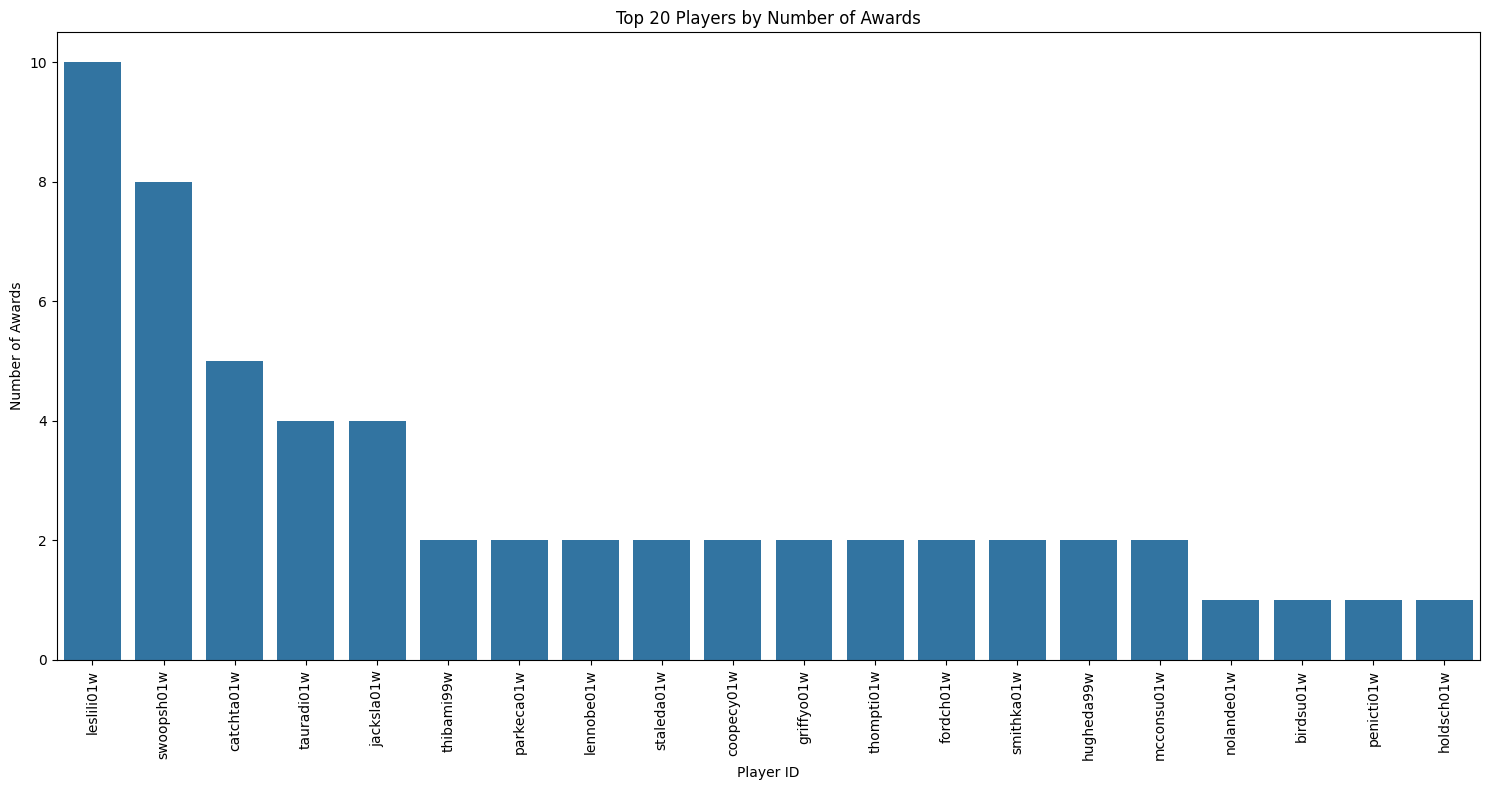

In [29]:
award_counts = awards_players['playerID'].value_counts().nlargest(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=award_counts.index, y=award_counts.values)
plt.title('Top 20 Players by Number of Awards')
plt.xlabel('Player ID')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **III.6.2 Award Types Distribution**
This section analyzes the distribution of different types of awards.

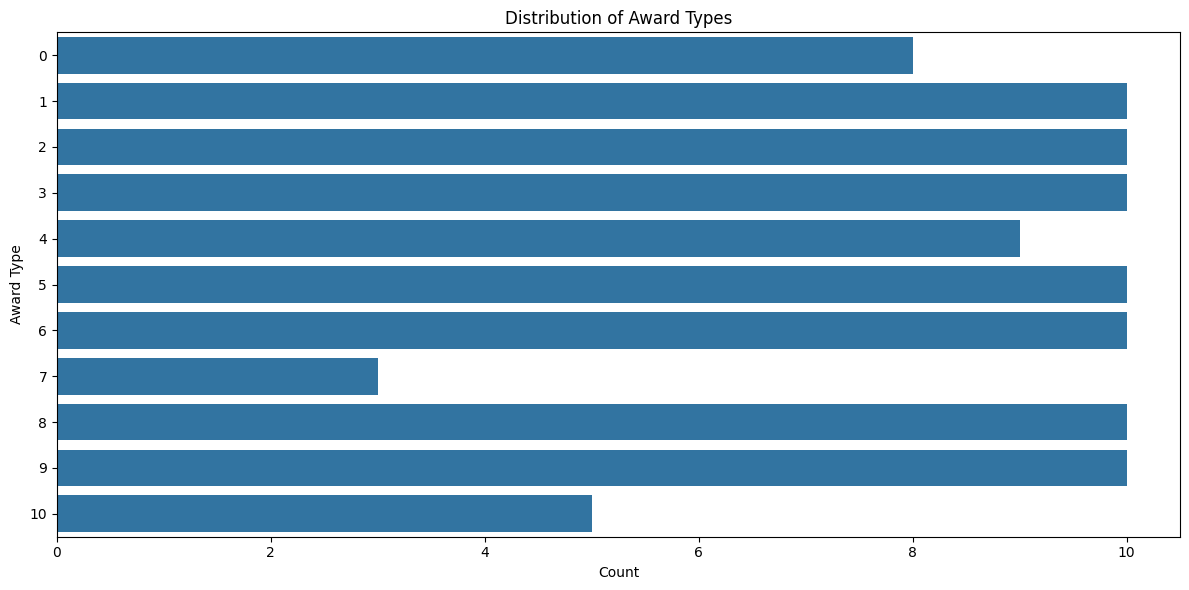

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=awards_players, y='award')
plt.title('Distribution of Award Types')
plt.xlabel('Count')
plt.ylabel('Award Type')
plt.tight_layout()
plt.show()